# Nareg Balian--nsb2165 Project 2

# Step 1:

### I imported the files and imported pandas and matplotlib. I discuss more about the data and my reasoning in the conclusion section.

#### These are the links to the data:

<https://cde.ucr.cjis.gov/LATEST/webapp/#>

#### and:

<https://hdpulse.nimhd.nih.gov/data-portal/social/table?age=001&age_options=ageall_1&demo=00007&demo_options=poverty_3&race=00&race_options=race_7&sex=0&sex_options=sexboth_1&socialtopic=080&socialtopic_options=social_6&statefips=00&statefips_options=area_states>

In [14]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

poverty_file = 'poverty_by_state.csv'
hate_crime_file = 'Table_12_Agency_Hate_Crime_Reporting_by_State_and_Federal_2023.csv'

poverty_data = pd.read_csv(poverty_file)
poverty_data.columns = ["State", "FIPS", "Poverty Rate (%)", "Families Below Poverty", "Rank within US"]

poverty_data


,State,FIPS,Poverty Rate (%),Families Below Poverty,Rank within US
0,"All Races (includes Hispanic/Latino), Both Sex...",NaN,NaN,NaN,NaN
1,Sorted by Value,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,State,FIPS,Value (Percent),Families (Below Poverty),Rank within US (of 52 states)
4,United States,0,8.8,7151167,NaN
...,...,...,...,...,...
59,HDPulse: An Ecosystem of Minority Health and H...,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN
61,Notes:,NaN,NaN,NaN,NaN
62,Source: Demographic data provided by the Censu...,NaN,NaN,NaN,NaN


# Step 2:

The poverty data was not cleaned, so I cleaned the data by dropping the rows that were not states. I utilized mapping for the states. I then converted the values to numeric values.



In [16]:
poverty_data = pd.read_csv(poverty_file, encoding='ISO-8859-1') #used GPT for this line

poverty_cleaned = poverty_data.iloc[3:].reset_index(drop=True) #used GPT for this line
poverty_cleaned.columns = [
    "State",
    "FIPS",
    "Poverty Rate (%)",
    "Families Below Poverty",
    "Rank within US"
]

poverty_cleaned = poverty_cleaned[poverty_cleaned["State"] != "State"].reset_index(drop=True) #used gpt for this line

valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming'
]
poverty_cleaned = poverty_cleaned[poverty_cleaned["State"].isin(valid_states)] #had GPT help with this one

poverty_cleaned["Poverty Rate (%)"] = pd.to_numeric(poverty_cleaned["Poverty Rate (%)"], errors="coerce") #used GPT for errors="coerce"
poverty_cleaned["Families Below Poverty"] = pd.to_numeric(poverty_cleaned["Families Below Poverty"], errors="coerce")
poverty_cleaned["Rank within US"] = pd.to_numeric(poverty_cleaned["Rank within US"], errors="coerce")

poverty_cleaned


,State,FIPS,Poverty Rate (%),Families Below Poverty,Rank within US
2,Mississippi,28000,14.4,106581,51
3,Louisiana,22000,13.9,156055,50
4,New Mexico,35000,13.7,68850,49
5,West Virginia,54000,11.9,53672,48
6,Kentucky,21000,11.7,133954,47
7,Arkansas,5000,11.6,88915,46
8,Alabama,1000,11.3,141807,45
9,Oklahoma,40000,11.0,108707,44
11,Texas,48000,10.7,765437,42
12,South Carolina,45000,10.2,134309,41


# Step 3:
I created a bar chart looking at the poverty rate by state with my cleaned data.

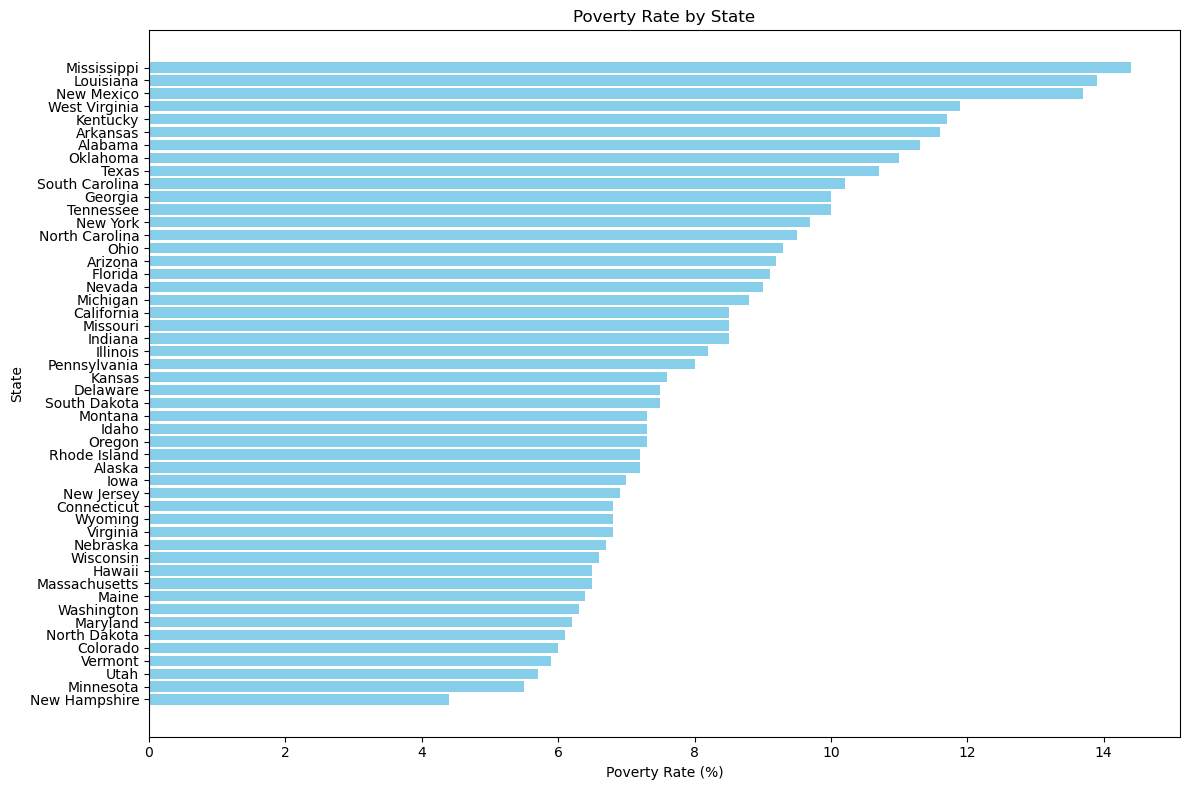

In [17]:
import matplotlib.pyplot as plt

poverty_cleaned_sorted = poverty_cleaned.sort_values(by="Poverty Rate (%)", ascending=False)

plt.figure(figsize=(12, 8)) #used GPT for this line
plt.barh(poverty_cleaned_sorted["State"], poverty_cleaned_sorted["Poverty Rate (%)"], color='skyblue')
plt.xlabel("Poverty Rate (%)")
plt.ylabel("State")
plt.title("Poverty Rate by State")
plt.gca().invert_yaxis()  # Invert y-axis for better readability--used GPT for this line
plt.tight_layout() #used GPT for this line
plt.show()


# Step 4:

I uploaded the FBI's hate crime data and created a data frame with specific columns that were interesting for me.

In [18]:
hate_crime_data = pd.read_csv(hate_crime_file, header=2)  # Skipping top two rows, used GPT for header=2
hate_crime_data.columns = [
    "State",
    "Participating Agencies",
    "Population Covered",
    "Submitting Agencies",
    "Total Incidents Reported"
]
hate_crime_data

,State,Participating Agencies,Population Covered,Submitting Agencies,Total Incidents Reported
0,Total,"16,009","318,788,491","3,161","11,862"
1,Alabama,408,"4,715,066",74,182
2,Alaska,32,"728,197",8,20
3,Arizona,107,"6,826,055",42,230
4,Arkansas,298,"2,981,249",15,28
...,...,...,...,...,...
107,"United States Postal Service, Office of Inspec...",1,NaN,0,0
108,"United States Railroad Retirement Board, Offic...",1,NaN,0,0
109,United States Securities and Exchange Commissi...,1,NaN,0,0
110,United States Treasury Inspector General for T...,1,NaN,1,3


# Step 5:

I cleaned the hate crime data by mapping again, using the correct encoding, and changing the specific values into floats.


In [19]:
hate_crime_data = pd.read_csv(hate_crime_file, encoding='ISO-8859-1') #used gpt for this line

hate_crime_cleaned = hate_crime_data.iloc[3:].reset_index(drop=True) #used gpt for this line
hate_crime_cleaned.columns = [
    "State",
    "Participating Agencies",
    "Population Covered",
    "Submitting Agencies",
    "Total Incidents Reported"
]
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming'
]
hate_crime_cleaned = hate_crime_cleaned[hate_crime_cleaned["State"].isin(valid_states)] #had GPT help with this one

numeric_columns = [
    "Participating Agencies",
    "Population Covered",
    "Submitting Agencies",
    "Total Incidents Reported"
]
for col in numeric_columns:
    hate_crime_cleaned[col] = hate_crime_cleaned[col].str.replace(",", "").astype(float) #wanted to clean the data and make the strings a float value (also replace commas with nothing)

hate_crime_cleaned


,State,Participating Agencies,Population Covered,Submitting Agencies,Total Incidents Reported
0,Alabama,408.0,4715066.0,74.0,182.0
1,Alaska,32.0,728197.0,8.0,20.0
2,Arizona,107.0,6826055.0,42.0,230.0
3,Arkansas,298.0,2981249.0,15.0,28.0
4,California,842.0,38771948.0,334.0,1970.0
5,Colorado,224.0,5822451.0,55.0,272.0
6,Connecticut,108.0,3617176.0,53.0,103.0
7,Delaware,63.0,1031890.0,10.0,19.0
9,Florida,249.0,18148836.0,61.0,234.0
10,Georgia,447.0,10098610.0,57.0,138.0


# Step 6:
I created a bar chart looking at the hate crime data per state.

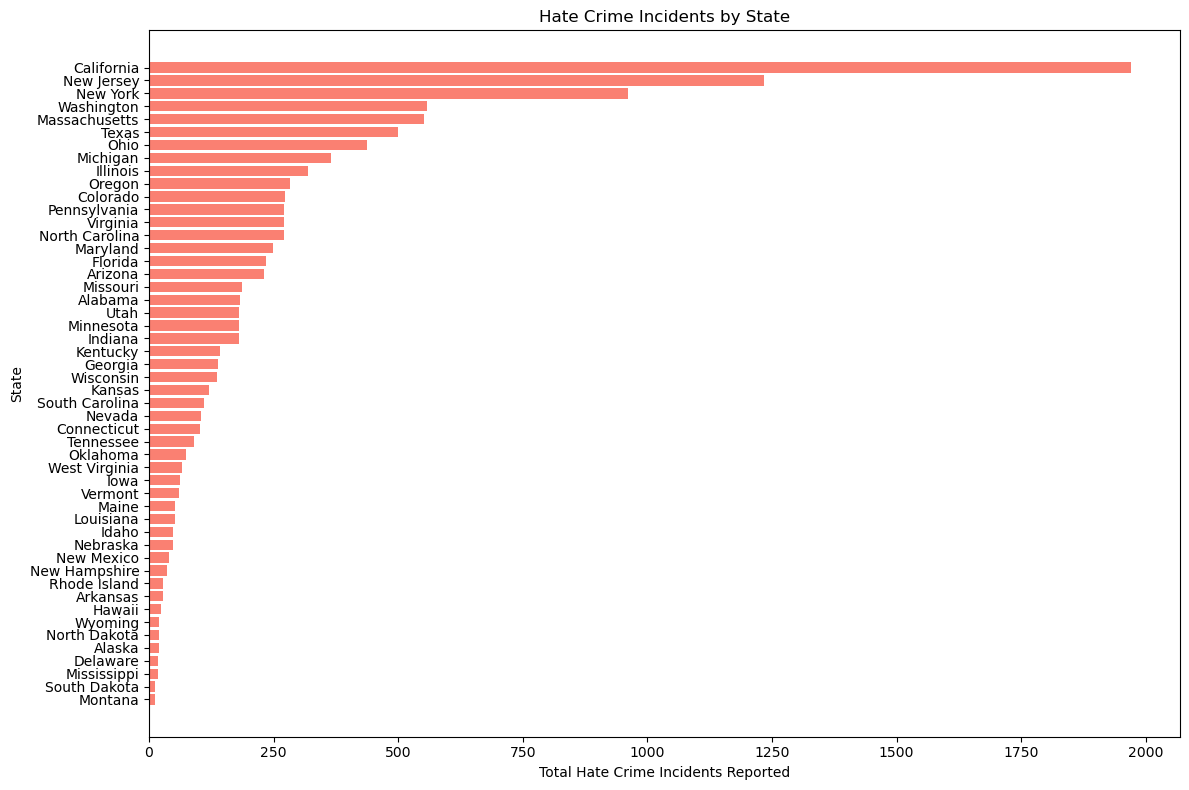

In [20]:
import matplotlib.pyplot as plt

hate_crime_cleaned_sorted = hate_crime_cleaned.sort_values(by="Total Incidents Reported", ascending=False)

plt.figure(figsize=(12, 8)) #used GPT for this line
plt.barh(hate_crime_cleaned_sorted["State"], hate_crime_cleaned_sorted["Total Incidents Reported"], color='salmon')
plt.xlabel("Total Hate Crime Incidents Reported")
plt.ylabel("State")
plt.title("Hate Crime Incidents by State")
plt.gca().invert_yaxis() #used GPT for this line
plt.tight_layout() #used GPT for this line
plt.show()


# Step 7:

I merged the poverty data and the hate crime data into one data frame. I used an inner merge on state.

In [21]:
merged_data = pd.merge( #had GPT help with this, but understand it
    poverty_cleaned[["State", "Poverty Rate (%)", "Families Below Poverty", "Rank within US"]],
    hate_crime_cleaned[["State", "Total Incidents Reported", "Participating Agencies", "Population Covered"]],
    on="State",
    how="inner"
)

merged_data


,State,Poverty Rate (%),Families Below Poverty,Rank within US,Total Incidents Reported,Participating Agencies,Population Covered
0,Mississippi,14.4,106581,51,17.0,156.0,1711605.0
1,Louisiana,13.9,156055,50,52.0,145.0,3423421.0
2,New Mexico,13.7,68850,49,40.0,100.0,1885968.0
3,West Virginia,11.9,53672,48,66.0,248.0,1555284.0
4,Kentucky,11.7,133954,47,143.0,427.0,4524497.0
5,Arkansas,11.6,88915,46,28.0,298.0,2981249.0
6,Alabama,11.3,141807,45,182.0,408.0,4715066.0
7,Oklahoma,11.0,108707,44,75.0,460.0,4053824.0
8,Texas,10.7,765437,42,499.0,1359.0,30161963.0
9,South Carolina,10.2,134309,41,111.0,489.0,5363912.0


# Step 8:

I created a scatter plot looking at the relationship between poverty rate and hate crime incidents. I included an OLS trendline.

In [22]:
import plotly.express as px

fig = px.scatter(
    merged_data,
    x="Poverty Rate (%)",
    y="Total Incidents Reported",
    title="Relationship Between Poverty Rate and Hate Crime Incidents",
    labels={"Poverty Rate (%)": "Poverty Rate (%)", "Total Incidents Reported": "Hate Crimes"},
    trendline="ols"
)

fig.show()

# Step 9:

I included the OLS results below (analysis of which will be in the conclusion section):

In [23]:
ols_results = px.get_trendline_results(fig) #used GPT for this code
print(ols_results.iloc[0]['px_fit_results'].summary()) #used GPT for this line

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.09234
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.763
Time:                        20:21:20   Log-Likelihood:                -362.42
No. Observations:                  50   AIC:                             728.8
Df Residuals:                      48   BIC:                             732.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        286.4445    187.420      1.528      0.1

# Step 10:
I realized that I wanted to look at hate crimes per capita, so I created another column in the merged data by dividing the "Total Incidents Reported" column by the "Population Covered" column.

In [24]:
merged_data["Hate Crimes Per Capita"] = merged_data["Total Incidents Reported"] / merged_data["Population Covered"]
merged_data

,State,Poverty Rate (%),Families Below Poverty,Rank within US,Total Incidents Reported,Participating Agencies,Population Covered,Hate Crimes Per Capita
0,Mississippi,14.4,106581,51,17.0,156.0,1711605.0,0.000010
1,Louisiana,13.9,156055,50,52.0,145.0,3423421.0,0.000015
2,New Mexico,13.7,68850,49,40.0,100.0,1885968.0,0.000021
3,West Virginia,11.9,53672,48,66.0,248.0,1555284.0,0.000042
4,Kentucky,11.7,133954,47,143.0,427.0,4524497.0,0.000032
5,Arkansas,11.6,88915,46,28.0,298.0,2981249.0,0.000009
6,Alabama,11.3,141807,45,182.0,408.0,4715066.0,0.000039
7,Oklahoma,11.0,108707,44,75.0,460.0,4053824.0,0.000019
8,Texas,10.7,765437,42,499.0,1359.0,30161963.0,0.000017
9,South Carolina,10.2,134309,41,111.0,489.0,5363912.0,0.000021


# Step 11:

I created another scatter plot looking at the relationship between poverty rate and hate crimes per capita. I also included an OLS trendline.

In [25]:
import plotly.express as px

fig = px.scatter(
    merged_data,
    x="Poverty Rate (%)",
    y="Hate Crimes Per Capita",
    title="Relationship Between Poverty Rate and Hate Crimes Per Capita",
    labels={"Poverty Rate (%)": "Poverty Rate (%)", "Hate Crimes Per Capita": "Hate Crimes Per Capita"},
    trendline="ols"
)

fig.show()


# Step 12:

I also included the OLS results from this data. See discussion in the conclusion section.

In [26]:
ols_results2 = px.get_trendline_results(fig) #Copied from above--GPT helped
print(ols_results2.iloc[0]["px_fit_results"].summary()) #Copied from above--GPT helped

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     6.692
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0128
Time:                        20:21:20   Log-Likelihood:                 466.09
No. Observations:                  50   AIC:                            -928.2
Df Residuals:                      48   BIC:                            -924.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         6.4e-05   1.19e-05      5.367      0.0

# Conclusion:

So, the final output is the one visualization that I want to show. Namely the relationship between poverty rate and hate crimes per capita. I used the Census Bureau (from the National Institute on Monetary Health and Health Disparities) for the poverty rate data. I used FBI data for the hate crimes data. First I loaded in and then cleaned up the data. I needed to encode it correctly and used GPT for help on that section. I then needed to eliminate all the extra, excess information in the data that I did not need. So I essentially labled the valid states and droped all the other stuff not in that list. I then created two bar charts looking at the data and making sure it came out clean. I then merged the data set and looked at the relationship poverty rate and hate crime incidents using OLS. This was not statistically significant and not really a useful metric to look at because different states have different populations. So I created a column with hate crimes per capita and then looked at another scatter chart with OLS. The key takeaways are interesting for this one (Relationship between Poverty Rate and Hate Crimes Per Capita):

1.   There is a statistically significant negative relationship between poverty rate and hate cries per capita. A higher poverty rate is associated with lower hate crimes per capita. This is surprising.
2.   Although there is a statistical significance, I hestitate to draw causal conclusions from the data. There is a lot of omitted variable bias. For example, states that are more culturally homogeneous could be poorer.

I printed the OLS regression output for both graphs, but for the purpose of this project, the most important visualization is the scatter plot of Relationship between Poverty Rate and Hate Crimes Per Capita.
